titoli selezionati facenti parte di:
- settore tecnologico:  1) NVIDIA data l'esplosione dell'intelligenza artificiale
                        2) INTEL attualmente scontato ottima opportunità
- settore della sanità: 1) Johnosn e Johnson
                        2) PFIZER
- settore finanziario:  1) JPMorgan Chase (JPM)
                        2) Bank Of America (GS)

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf # per il download dei dati storici dei titoli
import matplotlib.pyplot as plt # per il plot dei grafici
import datetime as dt # per la gestione delle date

In [2]:
IMAGE_PATH = 'images/'

In [3]:
#iniziamo a scaricare i dati storici dei titoli
start_date = dt.datetime(2014,5,31)
end_date = dt.datetime(2024,5,31)

tickers = ["NVDA", "INTC", "HII", "TDG", "JPM", "BAC"]
# scarichiamo i dati di tutti i titoli

data_df = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
#riordiniamo le colonne 
data_df = data_df[tickers]
data_df.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker,NVDA,INTC,HII,TDG,JPM,BAC
Date,,,,,,
2014-06-02,0.450742,20.772064,84.787064,116.768120,41.902771,12.456397
2014-06-03,0.448838,21.076860,84.854233,117.469086,42.092037,12.415583
2014-06-04,0.449315,21.031143,84.887794,117.542877,42.152618,12.415583
2014-06-05,0.451218,21.076860,85.458595,117.426048,42.871807,12.595167
2014-06-06,0.452884,21.465485,86.037773,120.260712,43.129200,12.725771
2014-06-09,0.453360,21.267363,86.658943,121.133827,43.469872,12.929842
2014-06-10,0.455740,21.518824,86.121704,120.162308,43.833252,12.995140
2014-06-11,0.461690,21.282602,84.795471,120.051628,43.356323,12.725771
2014-06-12,0.464546,21.305464,83.217438,118.260452,43.182201,12.587002


In [4]:
data_df.tail(10)

Ticker,NVDA,INTC,HII,TDG,JPM,BAC
Date,,,,,,
2024-05-16,94.351250,32.029999,254.834442,1286.319946,202.470001,38.982903
2024-05-17,92.471397,31.830000,254.277344,1291.949951,204.789993,39.052479
2024-05-20,94.772217,32.099998,254.267380,1312.760010,195.580002,38.585320
2024-05-21,95.378166,31.740000,252.446854,1336.839966,199.520004,39.410305
2024-05-22,94.942200,31.420000,253.173080,1326.189941,198.309998,39.519634
2024-05-23,103.790482,30.080000,251.571411,1330.719971,196.919998,38.933201
2024-05-24,106.460258,30.719999,254.874237,1350.310059,200.710007,39.459999
2024-05-28,113.891647,31.059999,251.442078,1317.939941,199.500000,39.082298
2024-05-29,114.815567,30.129999,247.015106,1312.290039,198.110001,38.485924


In [5]:
#piccola pulizia dei dati
data_df = data_df.dropna()

In [6]:
#creaimo una cartella per salvare i grafici
import os
def create_folder(folder):
    if not os.path.exists(folder):
        os.mkdir(folder)

create_folder(IMAGE_PATH)

In [7]:
create_folder('data')
data_df.to_csv('data/data.csv')

In [8]:
#grafico dei dati
#costruiamo una lista di colori per i titoli in modo che siano sempre uguali
STOCK_PATH = IMAGE_PATH + "/stock_prices/"
create_folder(STOCK_PATH)
colors = ["red", "green", "blue", "black", "orange", "purple"]
data_df.plot(figsize=(12,8), color=colors)
plt.ylabel("Adj closed Price")
plt.title("Stock Prices")
plt.savefig(STOCK_PATH + "stock_prices.png")
plt.close()

In [9]:
#plottiamo tutti i titoli tranne NVDA
data_df.drop("TDG", axis=1).plot(figsize=(12,8), color=colors[0:3] + colors[4:6])
plt.ylabel("Adj closed Price")
plt.title("Stock Prices without TDG")
plt.savefig(STOCK_PATH + "stocksWithoutTDG.png")
plt.close()

2) RENDIMENTI

In [10]:
rsNetti_df = data_df.pct_change().dropna()
rsNetti_df.columns = [col + "_RSnetto" for col in rsNetti_df.columns]
rsNetti_df.head()

,NVDA_RSnetto,INTC_RSnetto,HII_RSnetto,TDG_RSnetto,JPM_RSnetto,BAC_RSnetto
Date,,,,,,
2014-06-03,-0.004224,0.014673,0.000792,0.006003,0.004517,-0.003277
2014-06-04,0.001061,-0.002169,0.000396,0.000628,0.001439,0.000000
2014-06-05,0.004237,0.002174,0.006724,-0.000994,0.017062,0.014464
2014-06-06,0.003692,0.018438,0.006777,0.024140,0.006004,0.010369
2014-06-09,0.001051,-0.009230,0.007220,0.007260,0.007899,0.016036


In [11]:
rsLordi_df = rsNetti_df + 1
rsLordi_df.columns = [col.replace("RSnetto", "RSlordo") for col in rsLordi_df.columns]
rsLordi_df.head()

,NVDA_RSlordo,INTC_RSlordo,HII_RSlordo,TDG_RSlordo,JPM_RSlordo,BAC_RSlordo
Date,,,,,,
2014-06-03,0.995776,1.014673,1.000792,1.006003,1.004517,0.996723
2014-06-04,1.001061,0.997831,1.000396,1.000628,1.001439,1.000000
2014-06-05,1.004237,1.002174,1.006724,0.999006,1.017062,1.014464
2014-06-06,1.003692,1.018438,1.006777,1.024140,1.006004,1.010369
2014-06-09,1.001051,0.990770,1.007220,1.007260,1.007899,1.016036


In [12]:
rsLogaritmici_df = np.log(rsLordi_df)
rsLogaritmici_df.columns = [col.replace("RSlordo", "Rlog") for col in rsLogaritmici_df.columns]
rsLogaritmici_df.head()

,NVDA_Rlog,INTC_Rlog,HII_Rlog,TDG_Rlog,JPM_Rlog,BAC_Rlog
Date,,,,,,
2014-06-03,-0.004233,0.014567,0.000792,0.005985,0.004507,-0.003282
2014-06-04,0.001060,-0.002171,0.000395,0.000628,0.001438,0.000000
2014-06-05,0.004228,0.002171,0.006702,-0.000994,0.016918,0.014361
2014-06-06,0.003685,0.018271,0.006754,0.023853,0.005986,0.010316
2014-06-09,0.001050,-0.009273,0.007194,0.007234,0.007868,0.015909


In [13]:
cum_df = rsLordi_df.cumprod()
cum_df.columns = [col.replace("RSlordo", "Rcomposito") for col in cum_df.columns]
cum_df.head()

,NVDA_Rcomposito,INTC_Rcomposito,HII_Rcomposito,TDG_Rcomposito,JPM_Rcomposito,BAC_Rcomposito
Date,,,,,,
2014-06-03,0.995776,1.014673,1.000792,1.006003,1.004517,0.996723
2014-06-04,0.996832,1.012472,1.001188,1.006635,1.005963,0.996723
2014-06-05,1.001056,1.014673,1.007920,1.005634,1.023126,1.011140
2014-06-06,1.004752,1.033382,1.014751,1.029910,1.029268,1.021625
2014-06-09,1.005808,1.023844,1.022077,1.037388,1.037398,1.038008


In [14]:
cum_df.tail()

,NVDA_Rcomposito,INTC_Rcomposito,HII_Rcomposito,TDG_Rcomposito,JPM_Rcomposito,BAC_Rcomposito
Date,,,,,,
2024-05-23,230.265600,1.448099,2.967097,11.396261,4.699451,3.125559
2024-05-24,236.188665,1.478909,3.006051,11.564030,4.789898,3.167850
2024-05-28,252.675661,1.495277,2.965571,11.286813,4.761022,3.137528
2024-05-29,254.725434,1.450506,2.913358,11.238427,4.727850,3.089651
2024-05-30,245.130939,1.453394,2.947619,11.320299,4.756965,3.082470


RENDIMENTO COMPOSTO ANNUO PER OGNI TITOLO

In [15]:
delta = end_date - start_date
delta.days

3653

In [16]:
annualized_return = cum_df.iloc[-1] ** (365/delta.days) - 1
#rename the series indexes
annualized_return.index = [col.replace("Rcomposito", "annualizedReturn") for col in annualized_return.index]
annualized_return

NVDA_annualizedReturn    0.732781
INTC_annualizedReturn    0.038066
HII_annualizedReturn     0.114060
TDG_annualizedReturn     0.274381
JPM_annualizedReturn     0.168631
BAC_annualizedReturn     0.119051
Name: 2024-05-30 00:00:00, dtype: float64

Grafico dei ritorni logaritmici e dei ritorni semplici

In [17]:
RETURNS_PATH = IMAGE_PATH + "/returns/"
create_folder(RETURNS_PATH)

In [18]:
def plot_netReturns_vs_logReturns(netReturns, logReturns, tickertitle):
    #netReturns is a series of net returns
    #logReturns is a series of log returns
    plt.subplot(2,1,1)
    plt.title(tickertitle + " Net Returns and Log Returns")
    netReturns.plot(figsize=(10,6), color="blue")
    plt.ylabel("Net Returns")
    plt.subplot(2,1,2)
    logReturns.plot(figsize=(10,6), color="green")
    plt.ylabel("Log Returns")
    plt.savefig(RETURNS_PATH + tickertitle + "_returns.png")
    plt.close()
    #plt.show()


In [19]:
#siccome i grafici non escono molto smooth, possiamo mensilizzare i ritorni
rs_netti_mensili = rsNetti_df.groupby(pd.Grouper(freq="M")).last()
rs_log_mensili = rsLogaritmici_df.groupby(pd.Grouper(freq="M")).last()
print(rs_netti_mensili.isna().sum(), rs_log_mensili.isna().sum())

NVDA_RSnetto    0
INTC_RSnetto    0
HII_RSnetto     0
TDG_RSnetto     0
JPM_RSnetto     0
BAC_RSnetto     0
dtype: int64 NVDA_Rlog    0
INTC_Rlog    0
HII_Rlog     0
TDG_Rlog     0
JPM_Rlog     0
BAC_Rlog     0
dtype: int64


C:\Users\Riccardo\AppData\Local\Temp\ipykernel_27540\792554769.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_netti_mensili = rsNetti_df.groupby(pd.Grouper(freq="M")).last()
C:\Users\Riccardo\AppData\Local\Temp\ipykernel_27540\792554769.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_log_mensili = rsLogaritmici_df.groupby(pd.Grouper(freq="M")).last()


In [20]:
for ticker in tickers:
    plot_netReturns_vs_logReturns(rs_netti_mensili[ticker + "_RSnetto"], 
                                  rs_log_mensili[ticker + "_Rlog"], 
                                  ticker)

In [21]:
def plotCumulativeReturns_vs_simpleReturns(cumReturns, simpleReturns, tickertitle, count):
    #cumReturns is a series of cumulative returns
    #simpleReturns is a series of simple returns
    plt.subplot(2,1,1)
    plt.title(tickertitle + " Cumulative Returns and Simple Returns")
    cumReturns.plot(figsize=(10,6), color="blue")
    #we add the mean of the series as a horizontal line
    plt.axhline(cumReturns.mean(), color="red", linestyle="--", linewidth=2)
    plt.ylabel("Cumulative Returns")
    plt.subplot(2,1,2)
    simpleReturns.plot(figsize=(10,6), color="green")
    plt.axhline(simpleReturns.mean(), color="red", linestyle="--", linewidth=2)
    plt.ylabel("Simple Returns")
    plt.savefig( RETURNS_PATH + "cumReturnsVsSimpleReturns" + str(count) + ".png")
    #suppress plot output
    plt.close()

In [22]:
cumReturns_mensili = cum_df.groupby(pd.Grouper(freq="M")).last()

C:\Users\Riccardo\AppData\Local\Temp\ipykernel_27540\1154752585.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cumReturns_mensili = cum_df.groupby(pd.Grouper(freq="M")).last()


In [23]:
for i, ticker in enumerate(tickers):
    plotCumulativeReturns_vs_simpleReturns(cumReturns_mensili[ticker + "_Rcomposito"], 
                                           rs_netti_mensili[ticker + "_RSnetto"], 
                                           ticker,
                                           i)

ISTOGRAMMI E DISPERSIONE

In [24]:
HISTOGRAPH_PATH = IMAGE_PATH + "/histograms/"
create_folder(HISTOGRAPH_PATH)

In [25]:
#funzione per plottare gli istogrammi di due titoli
cmap = plt.get_cmap("turbo")
def plot_histograms(df, label1, label2, title):
    plt.figure(figsize=(12,8))
    plt.hist(df[[label1, label2]], bins=25, density=True, 
             edgecolor='black', color=[cmap(0.8), cmap(0.2)])
    plt.title(title)
    plt.legend([label1, label2], fontsize=15, loc="upper right")
    plt.xlabel("Net Return")
    plt.ylabel("Frequency")
    plt.savefig(HISTOGRAPH_PATH + title + ".png")
    plt.close()

In [26]:
#istogramma dei titoli tecnologici
plot_histograms(rs_netti_mensili, "NVDA_RSnetto", 
                "INTC_RSnetto", 
                "Net Return Histogram NVDA_INTC")
#dispersione dei titoli tecnologici
rsNetti_df[["NVDA_RSnetto", "INTC_RSnetto"]].std()

NVDA_RSnetto    0.029824
INTC_RSnetto    0.021047
dtype: float64

In [27]:
#istogramma dei titoli bellici
plot_histograms(rs_netti_mensili, "HII_RSnetto", 
                "TDG_RSnetto", 
                "Net Return Histogram HII_TDG")
#dispersione dei titoli farmaceutici
rsNetti_df[["HII_RSnetto", "TDG_RSnetto"]].std()

HII_RSnetto    0.017221
TDG_RSnetto    0.020850
dtype: float64

In [28]:
#istogramma dei titoli bancari
plot_histograms(rs_netti_mensili, "JPM_RSnetto", 
                "BAC_RSnetto", 
                "Net Return Histogram JPM_BAC")
#dispersione dei titoli bancari
rsNetti_df[["JPM_RSnetto", "BAC_RSnetto"]].std()

JPM_RSnetto    0.016972
BAC_RSnetto    0.019474
dtype: float64

ISTOGRAMMI SUI SINGOLI TITOLI

In [29]:
#definiamo una funzione per plottare l'istogramma dei singoli titoli.
rsNetti_df.columns = [col.replace("_RSnetto", "") for col in rsNetti_df.columns]
from scipy import stats
def plot_single_histogram(df):
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(hspace=0.5)
    for i, col in enumerate(df.columns):
        plt.subplot(3,2,i+1)
        #troviamo il numero ottimale di bins
        n_bins = (np.max(df[col], axis=0) - np.min(df[col], axis=0)) / (2*stats.iqr(df[col], axis=0) / np.power(len(df[col]), 1/3))
        n_bins = int(n_bins)
        plt.hist(df[col], bins=n_bins, edgecolor='black', color=cmap(0.8))
        plt.title(col)
        plt.xlabel("Net Return")
        plt.ylabel("Frequency")
    plt.savefig(HISTOGRAPH_PATH + "single_histograms" + ".png")
    plt.close()
    #plt.show()

In [30]:
plot_single_histogram(rsNetti_df)

In [31]:
THREE_SECTIONS_GRAPH_PATH = IMAGE_PATH + "/three_sections_graph/"
create_folder(THREE_SECTIONS_GRAPH_PATH)

In [32]:
#definiamo una funzione per creare grafici diagnostici a 3 sezioni (istogramma e kernel density, boxplot, qq-plot)
def plot_three_section_graph(title_df, title):
    plt.figure(figsize=(8,10))
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(3,1,1)
    plt.title(title + " histogram")
    plt.hist(title_df, bins=55, edgecolor='black', color=cmap(0.8), density=True)
    #plotting the kernel density
    title_df.plot.kde(color=cmap(0.2))
    plt.xlabel("Net Return")
    plt.ylabel("Frequency")
    plt.subplot(3,1,2)
    plt.title(title + " boxplot")
    title_df.plot.box()
    plt.ylabel("Net Return")
    plt.subplot(3,1,3)
    plt.title(title + " qq-plot")
    stats.probplot(title_df, dist="norm", plot=plt)
    plt.savefig(THREE_SECTIONS_GRAPH_PATH + title + ".png")
    #plt.show()
    plt.close()


In [33]:
for col in rsNetti_df.columns:
    plot_three_section_graph(rsNetti_df[col], col)

In [34]:
#calcolare le statistiche univariate
stats_df = pd.DataFrame(index=rsNetti_df.columns)
stats_df["Media"] = rsNetti_df.mean()
stats_df["varianza"] = rsNetti_df.var()
stats_df["Deviazione standard"] = rsNetti_df.std()
stats_df["Asimmetria"] = rsNetti_df.skew()
stats_df["Curtosi"] = rsNetti_df.kurt()

stats_df

,Media,varianza,Deviazione standard,Asimmetria,Curtosi
NVDA,0.002629,0.000889,0.029824,0.690360,9.271240
INTC,0.000371,0.000443,0.021047,-0.231853,10.310516
HII,0.000579,0.000297,0.017221,-0.281542,6.791667
TDG,0.001183,0.000435,0.020850,0.125962,22.424326
JPM,0.000764,0.000288,0.016972,0.297652,14.113182
BAC,0.000637,0.000379,0.019474,0.282793,10.097498


In [35]:
#calcoliamo la matrice di varianze/covarianze
cov_matrix = rsNetti_df.cov()
var_matrix = rsNetti_df.var()

In [36]:
var_matrix

NVDA    0.000889
INTC    0.000443
HII     0.000297
TDG     0.000435
JPM     0.000288
BAC     0.000379
dtype: float64

In [37]:
cov_matrix

,NVDA,INTC,HII,TDG,JPM,BAC
NVDA,0.000889,0.000306,0.000100,0.000229,0.000175,0.000197
INTC,0.000306,0.000443,0.000108,0.000153,0.000156,0.000172
HII,0.000100,0.000108,0.000297,0.000152,0.000134,0.000151
TDG,0.000229,0.000153,0.000152,0.000435,0.000190,0.000202
JPM,0.000175,0.000156,0.000134,0.000190,0.000288,0.000296
BAC,0.000197,0.000172,0.000151,0.000202,0.000296,0.000379


In [38]:
#creiamo la matrice delle correlazioni
corr_matrix = rsNetti_df.corr()

In [39]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,NVDA,INTC,HII,TDG,JPM,BAC
NVDA,1.000000,0.488112,0.195491,0.368466,0.345753,0.339758
INTC,0.488112,1.000000,0.298821,0.347971,0.436530,0.420699
HII,0.195491,0.298821,1.000000,0.423178,0.459850,0.449738
TDG,0.368466,0.347971,0.423178,1.000000,0.538235,0.497808
JPM,0.345753,0.436530,0.459850,0.538235,1.000000,0.895274
BAC,0.339758,0.420699,0.449738,0.497808,0.895274,1.000000


In [40]:
CORRELATION_PATH = IMAGE_PATH + "/correlation/"
create_folder(CORRELATION_PATH)

In [41]:
#definiamo una funzione per fare il grafico dell'andamento nel tempo della correlazione
def rolling_correlation_plot(df, title1, title2, ):
    plt.figure(figsize=(12,8))
    plt.title(title1 + " and " + title2 + " rolling correlation")
    df[title1].rolling(window=230).corr(df[title2]).plot()
    plt.ylabel("Correlation")
    plt.savefig(CORRELATION_PATH + title1 + "_" + title2 + "_rolling_correlation.png")
    plt.close()
    #plt.show()

In [42]:
rolling_correlation_plot(rsNetti_df, "NVDA", "INTC")

In [43]:
rolling_correlation_plot(rsNetti_df, "HII", "TDG")

In [44]:
rolling_correlation_plot(rsNetti_df, "JPM", "BAC")

In [45]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)
    ax.set_title(x_stock_name + " _ " + y_stock_name)
    fig.savefig(CORRELATION_PATH + x_stock_name + "_" + y_stock_name + "_scatter_plot.png")
    plt.close()

In [46]:
limits = (-0.20, 0.20)
render_scatter_plot(rsNetti_df, "NVDA", "INTC", limits)
render_scatter_plot(rsNetti_df, "HII", "TDG", limits)
render_scatter_plot(rsNetti_df, "JPM", "BAC", limits)

ANALISI DI PREVISIONE: costruiamo un modello di previsione SVM per prevedere i prezzi 

In [47]:
# n_train_months = 80
# n_val_months = 30
# n_test_months = 10

FORECAST_HORIZON = 10
N_TRAIN_MONTHS = 90
N_TEST_MONTHS = 30 

In [48]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import numpy as np
import os
import json
import seaborn as sns

In [49]:
def create_split_df(df, title, forecast_horizon):
    X = df[title]
    y = df[title].shift(-forecast_horizon)
    X = X[:-forecast_horizon]
    y = y[:-forecast_horizon]
    data = pd.DataFrame(index=df.index[:-forecast_horizon])
    data = pd.concat([X, y], axis=1)
    data.columns= ['X_title', 'y_title']
    return data

In [50]:
def make_train_test_split(df, n_train_months):
    X = df.drop(columns='y_title')
    y = df['y_title']
    X_train = X.iloc[:n_train_months*21]
    y_train = y.iloc[:n_train_months*21]
    X_test = X.iloc[n_train_months*21-1:]
    y_test = y.iloc[n_train_months*21-1:]
    return X_train, X_test, y_train, y_test

In [51]:
def get_best_svr(X_train, y_train, title):
    #create a file with the best configuration in the folder "config/" for the title passed
    if os.path.exists('config/best_params_{}.json'.format(title)):
        with open('config/best_params_{}.json'.format(title), 'r') as f:
            print("reading best configuration for {}".format(title))
            best_params = json.load(f)
        return SVR(**best_params)
    print("searching best configuration for {}".format(title))
    param_grid = {'C': [0.1, 1, 10, 100], 
                  'gamma': [1, 0.5, 0.2, 0.1, 0.01], 
                  'kernel': ['rbf', 'linear', 'poly'],
                  'epsilon': [0.01, 0.1, 0.5, 1]}
    grid = GridSearchCV(SVR(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    #dump the best params on file
    os.makedirs('config', exist_ok=True)
    with open('config/best_params_{}.json'.format(title), 'w') as f:
        json.dump(grid.best_params_, f)
    return grid.best_estimator_

In [52]:
def scale_data(X_train, X_test):
    #scale the data but keep the indexes
    print("scaling data")
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    return X_train, X_test

In [53]:
def plot_predictions(y_test, y_pred, y_train, title):
    COLORS = sns.color_palette("hls", 4)
    fig, ax = plt.subplots(1)
    ax = sns.lineplot(data=y_train, color=COLORS[0], label='Attuale')
    ax = sns.lineplot(data=y_test, color=COLORS[3], label='Test')
    ax.plot(y_test.index, y_pred, c=COLORS[1], label='Predizione')

    ax.set(title="{} stock price - actual vs. predicted".format(title), xlabel='Date', ylabel='Price ($)')
    ax.legend()
    fig.set_size_inches(12, 8)
    if not os.path.exists('images/predictions'):
        os.makedirs('images/predictions', exist_ok=True)
    plt.savefig('images/predictions/{}_predictions.png'.format(title))
    plt.show()

In [54]:
def plot_details_pred(y_test, y_pred, title):
    COLORS = sns.color_palette("hls", 4)
    fig, ax = plt.subplots(1)
    ax = sns.lineplot(data=y_test, color=COLORS[3], label='Attuale')
    ax.plot(y_test.index, y_pred, c=COLORS[1], label='Predizione')
    ax.set(title="{} stock price DETAIL OF - actual vs. predicted".format(title), xlabel='Date', ylabel='Price ($)')
    ax.legend()
    fig.set_size_inches(12, 8)
    if not os.path.exists('images/predictions'):
        os.makedirs('images/predictions', exist_ok=True)
    plt.savefig('images/predictions/{}_DETAIL_predictions.png'.format(title))
    plt.show()

building a model to predict the price for NVDA
scaling data
reading best configuration for NVDA
NVDA MSE: 16.728686455316193
NVDA RMSE: 4.0900716931755845
NVDA MAE: 2.9506888141810403


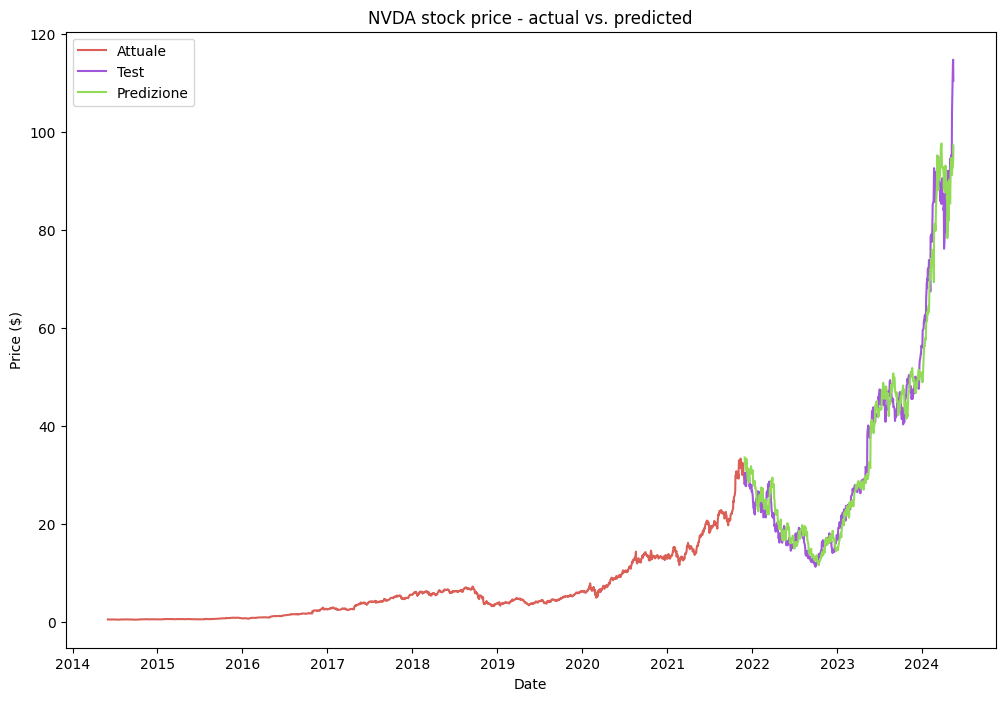

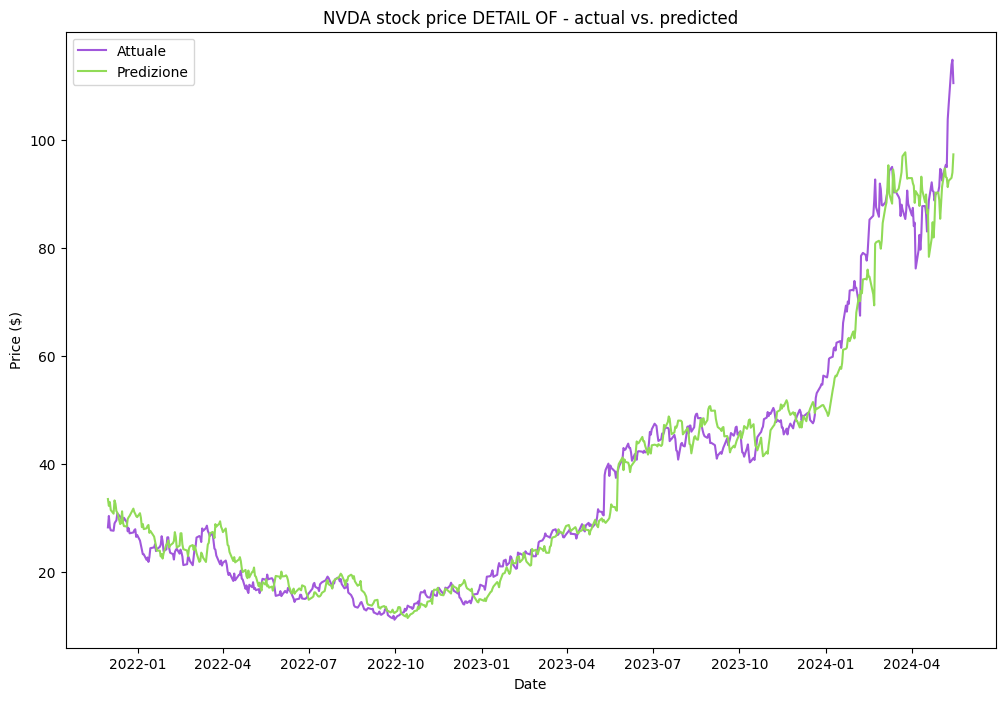

building a model to predict the price for INTC
scaling data
reading best configuration for INTC
INTC MSE: 8.084627715331607
INTC RMSE: 2.8433479764762537
INTC MAE: 2.277239672154363


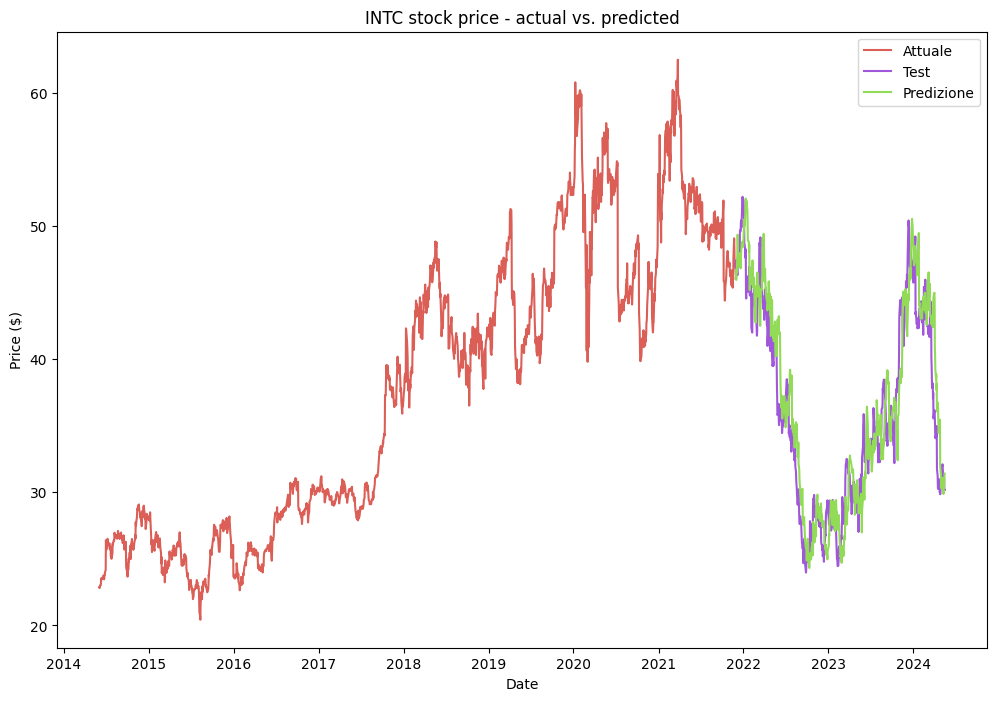

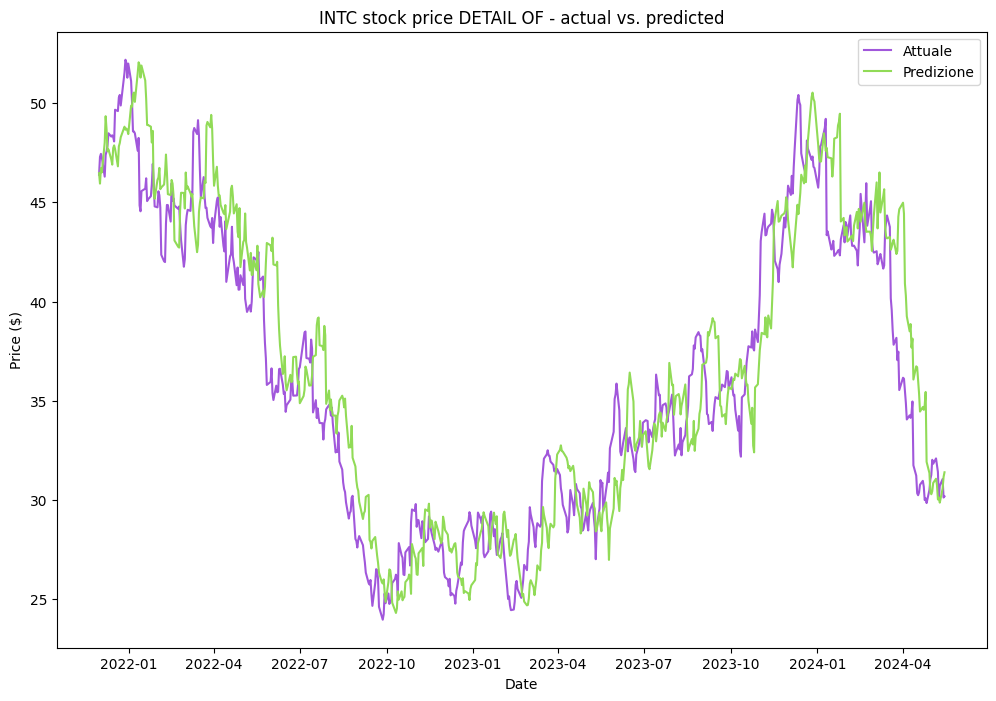

building a model to predict the price for HII
scaling data
reading best configuration for HII
HII MSE: 127.39763472482556
HII RMSE: 11.28705606988933
HII MAE: 9.027559920893278


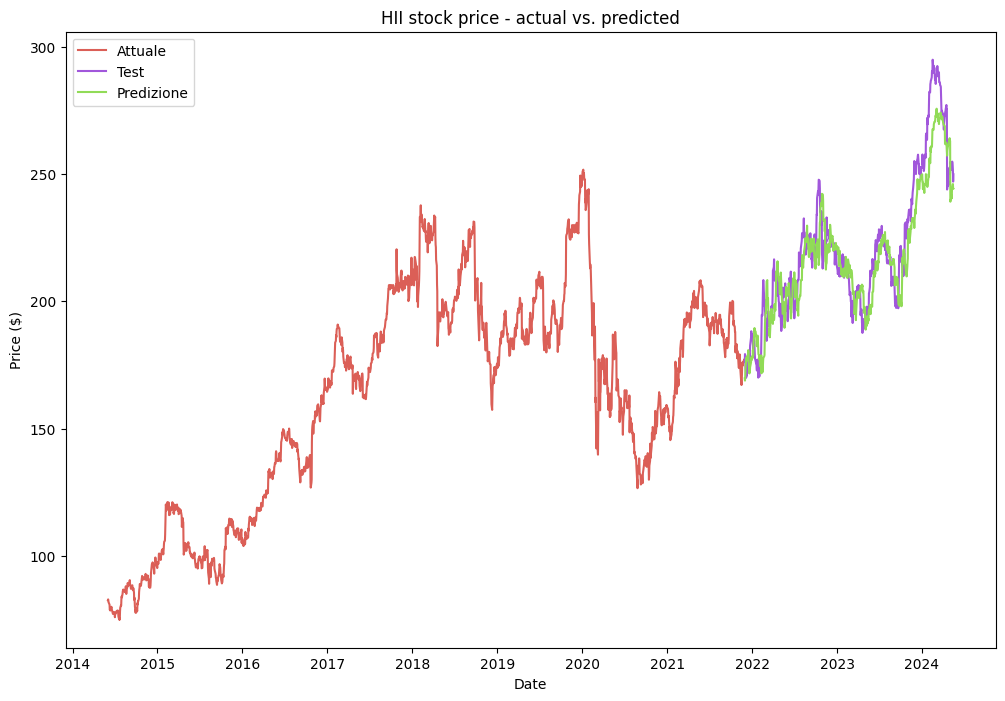

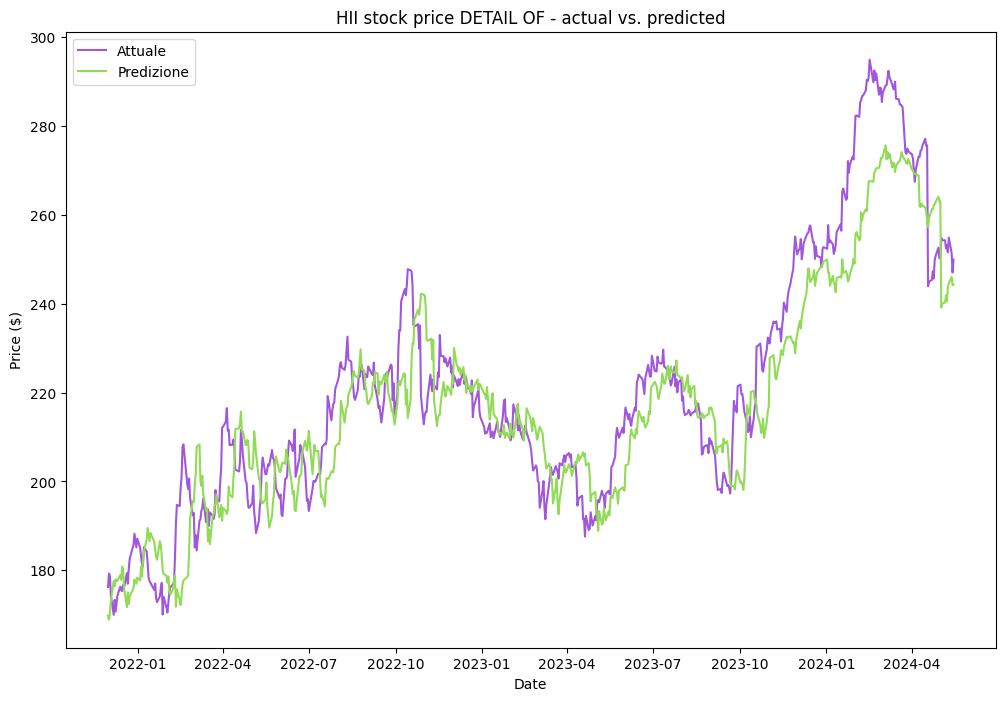

building a model to predict the price for TDG
scaling data
reading best configuration for TDG
TDG MSE: 13982.269729758998
TDG RMSE: 118.24664785844459
TDG MAE: 78.94781158108208


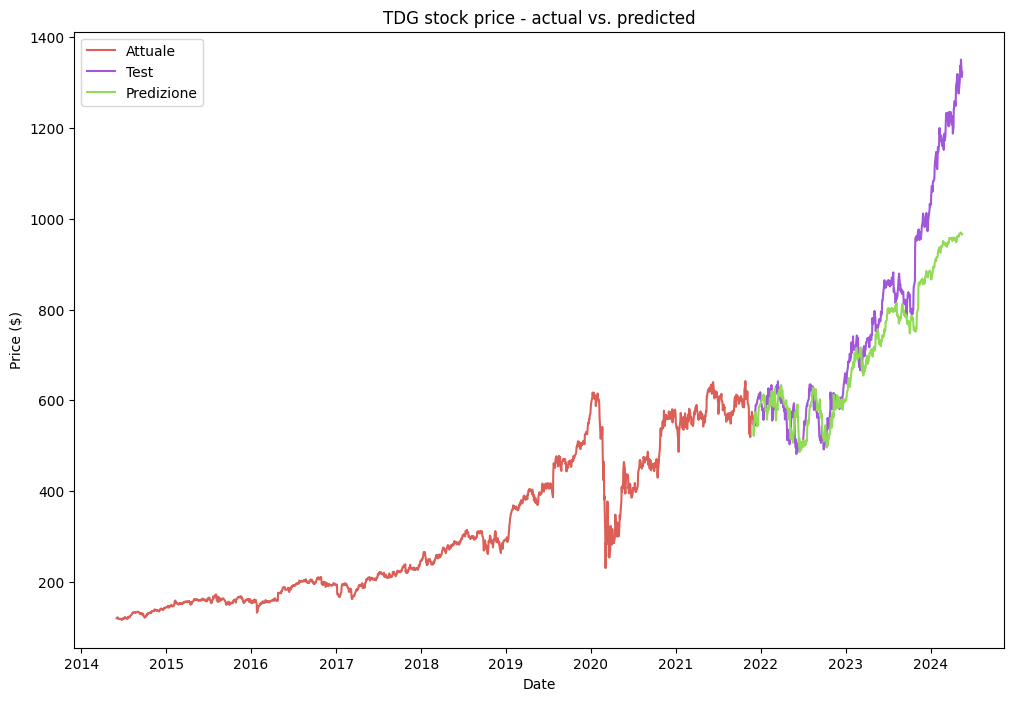

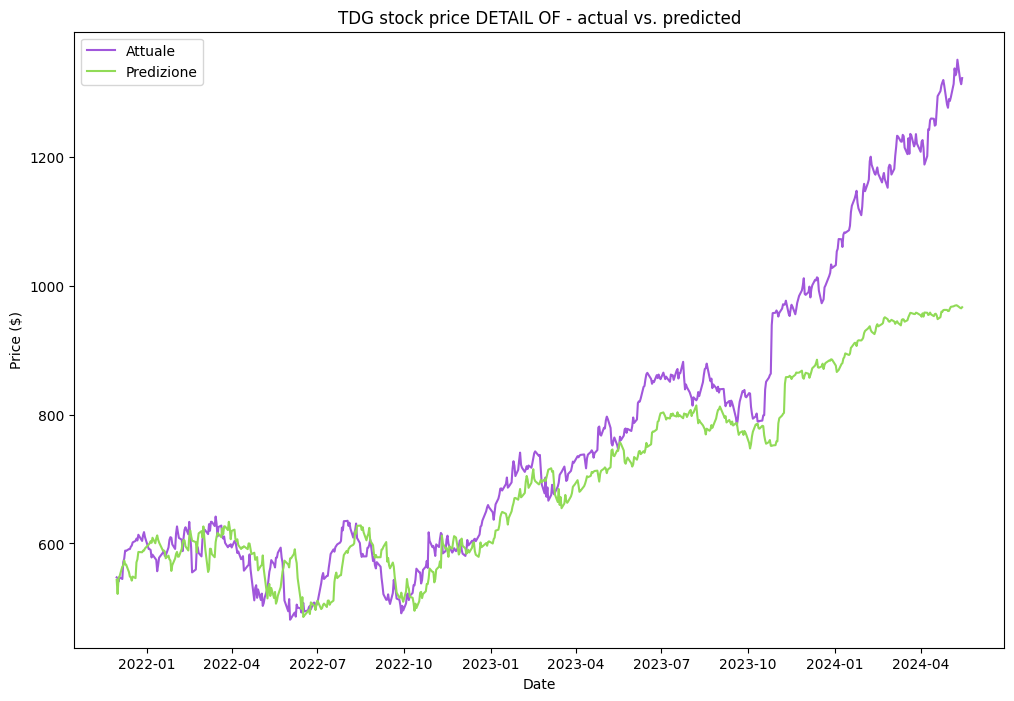

building a model to predict the price for JPM
scaling data
reading best configuration for JPM
JPM MSE: 50.628148939149284
JPM RMSE: 7.115346016825133
JPM MAE: 5.568456925128273


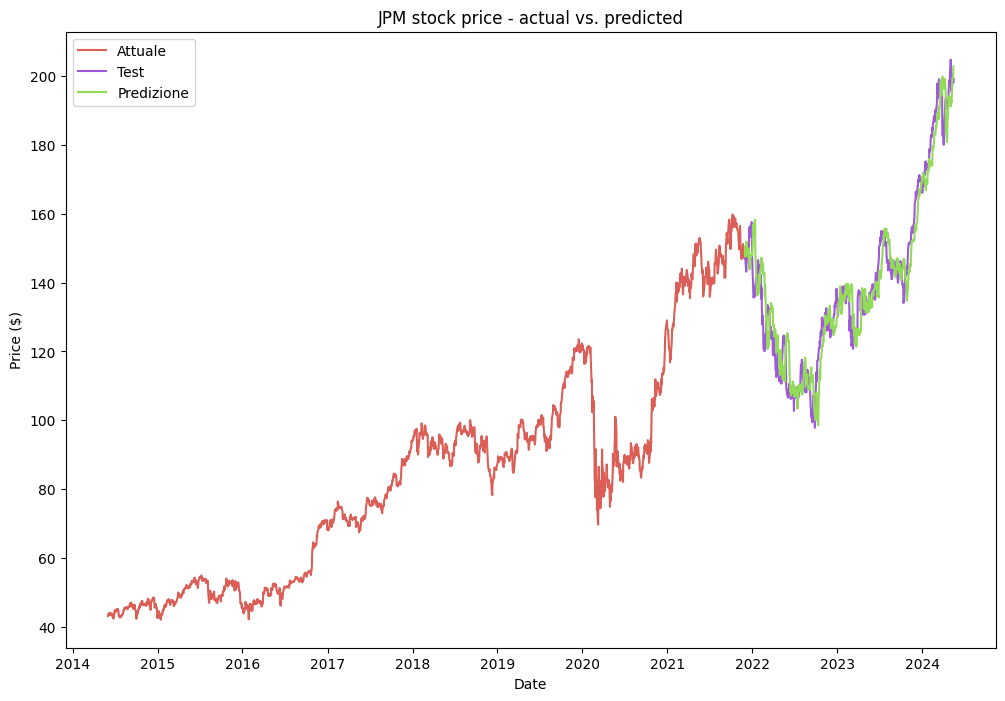

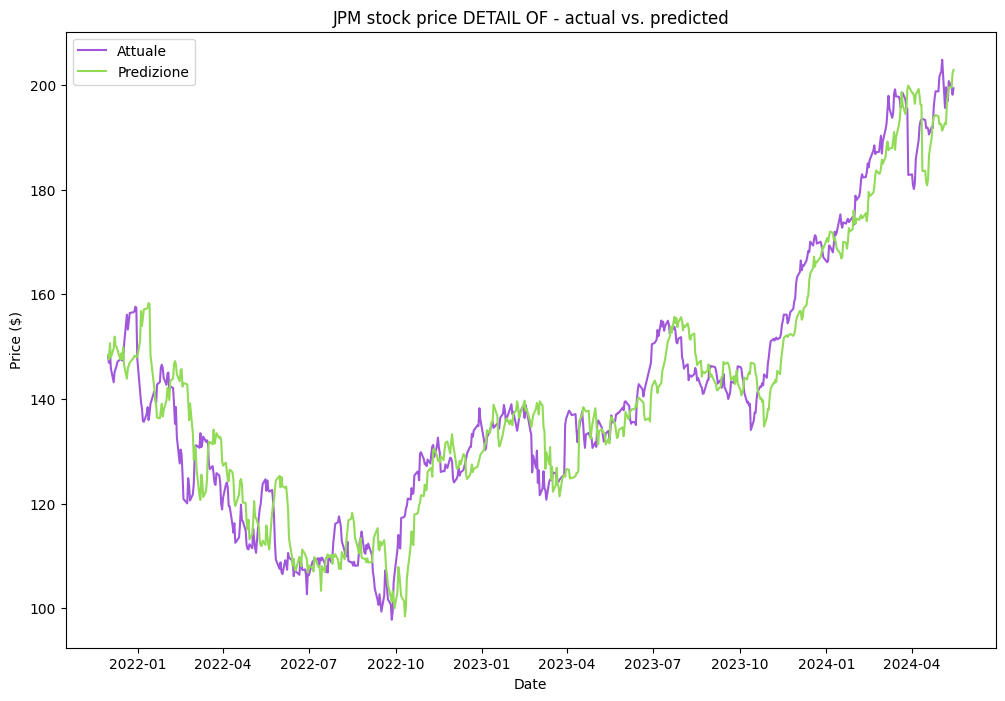

building a model to predict the price for BAC
scaling data
reading best configuration for BAC
BAC MSE: 4.391098649855041
BAC RMSE: 2.095494846057857
BAC MAE: 1.6342070039313272


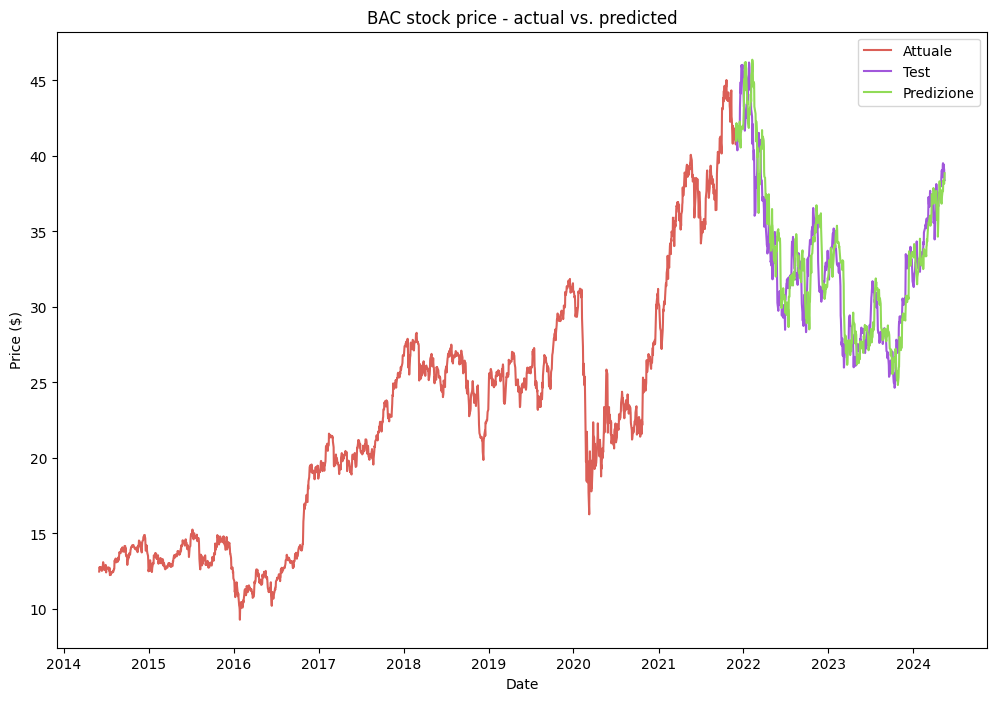

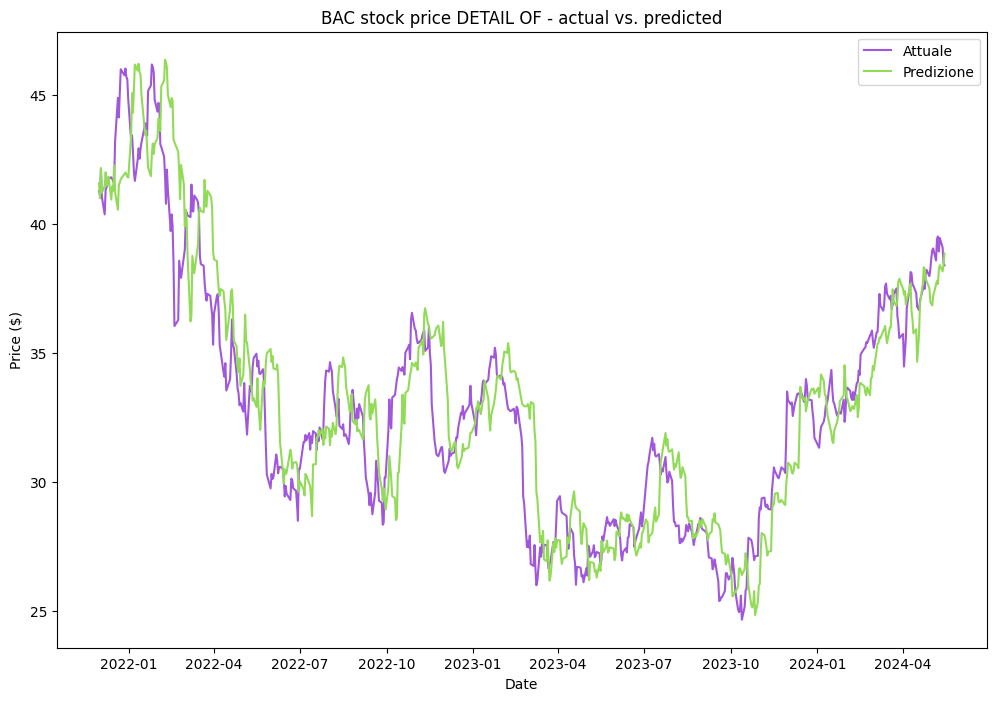

In [55]:
data_df = pd.read_csv('data/data.csv', index_col=0, parse_dates=True)
for title in data_df.columns:
    print("building a model to predict the price for {}".format(title))
    title_df = create_split_df(data_df, title, FORECAST_HORIZON)
    X_train, X_test, y_train, y_test = make_train_test_split(title_df, N_TRAIN_MONTHS)
    X_train, X_test = scale_data(X_train, X_test)
    svr = get_best_svr(X_train, y_train, title)
    svr.fit(X_train, y_train)
    X_test = X_test.sort_index()
    y_pred = svr.predict(X_test)
    y_test = y_test.sort_index()
    predictions_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
    predictions_df.to_csv('data/{}_predictions.csv'.format(title))
    print('{} MSE:'.format(title), mean_squared_error(y_test, y_pred))
    print('{} RMSE:'.format(title),np.sqrt(mean_squared_error(y_test, y_pred)))
    print('{} MAE:'.format(title), mean_absolute_error(y_test, y_pred))
    plot_predictions(y_test, y_pred, y_train, title)
    plot_details_pred(y_test, y_pred, title)